In [1]:
import tensorflow as tf
# from tensorflow.keras.datasets import mnist, imdb
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

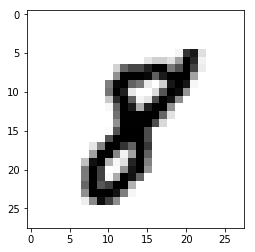

In [3]:
## visualize image before normalizing
plt.imshow(x_train[17], cmap=plt.cm.binary)
plt.show()

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

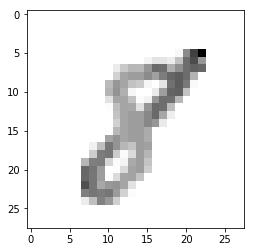

In [5]:
## visualize image after normalizing
plt.imshow(x_train[17], cmap=plt.cm.binary)
plt.show()

In [6]:
## define & compile model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.25)
#,validation_data=(x_test, y_test))

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 5s 104us/step - loss: 0.5036 - acc: 0.8685 - val_loss: 0.3059 - val_acc: 0.9119
Epoch 2/5
45000/45000 [==============================] - 4s 85us/step - loss: 0.2828 - acc: 0.9179 - val_loss: 0.2680 - val_acc: 0.9225
Epoch 3/5
45000/45000 [==============================] - 4s 84us/step - loss: 0.2392 - acc: 0.9309 - val_loss: 0.2387 - val_acc: 0.9322
Epoch 4/5
45000/45000 [==============================] - 4s 84us/step - loss: 0.2012 - acc: 0.9418 - val_loss: 0.2194 - val_acc: 0.9364
Epoch 5/5
45000/45000 [==============================] - 4s 84us/step - loss: 0.1721 - acc: 0.9503 - val_loss: 0.1908 - val_acc: 0.9445


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
>>> history_dict = history.history
>>> history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

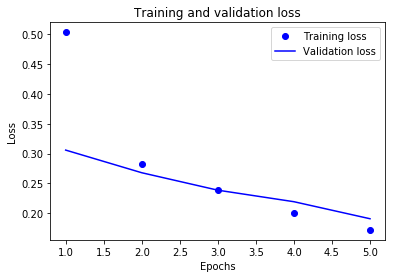

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

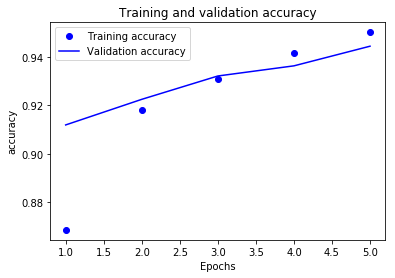

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [12]:
## Prediction

pred = model.predict(x_test)

In [14]:
pred[0]

array([7.1602194e-08, 5.4872267e-09, 7.2787254e-05, 8.2672539e-04,
       9.6971386e-10, 1.3259394e-06, 9.4589545e-12, 9.9908173e-01,
       1.6807400e-06, 1.5705735e-05], dtype=float32)

In [16]:
y_test[0]

7